1.importing required pythin libraries

In [1]:
#importing required pythin libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv")

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


we will see how to hudle the missing value

In [7]:
df.drop(columns=['Cabin'],inplace=True)

In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [9]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [10]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


2.FILLING A MISSING VALUE!!

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode)
df['Fare']=df['Fare']=df['Fare'].fillna(df['Fare'].mode)


# 3.outlier detaction


In [14]:
num_cols=['Age']
for col in num_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


Text(0.5, 1.0, 'box plot of Age after outlier handling')

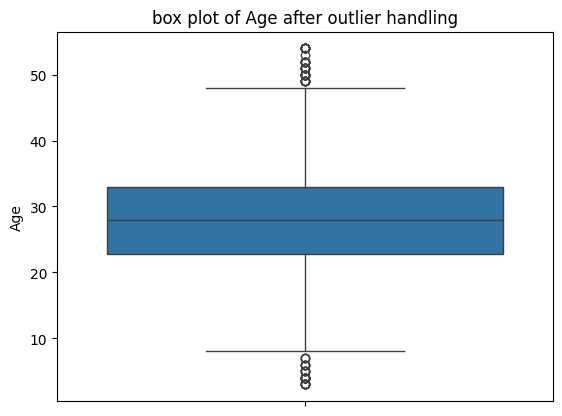

In [16]:
sns.boxplot (data=df['Age'])
plt.title('box plot of Age after outlier handling')

4.detacting duplicte data value

In [15]:
#Backup the original df
df_copy=df.copy()


In [17]:
df=df.drop_duplicates()

In [18]:
df.duplicated().sum()

np.int64(0)


# 4.correcting inconsistency



6.evaluation matrics